# <center> CCT College Dublin </center>

## <center> Assessment Cover Page</center>


<br><br><br>
---

<span style="font-size:larger;">

**Module Title:**&nbsp;&nbsp;&nbsp; Machine Learning for Business
	
**Assessment Title:**&nbsp;&nbsp;&nbsp; CA1
	
**Lecturer Name:**&nbsp;&nbsp;&nbsp; Dr. Muhammad Iqbal
	
**Student Full Name:**&nbsp;&nbsp;&nbsp;Yumiko Maria Bejarano Azogue 
	
**Student Number:**&nbsp;&nbsp;&nbsp; 2024144
	
**Assessment Due Date:**&nbsp;&nbsp;&nbsp; 11th September 2024
	
**Date of Submission:**&nbsp;&nbsp;&nbsp; 27th October 2024
    
</span> 

<br><br><br>



In [1]:
# Import the required package

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
import yfinance as yf

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, silhouette_samples
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings, logging

warnings.filterwarnings("ignore")
logging.captureWarnings(True)
logger = logging.getLogger("py.warnings")
logger.setLevel(logging.ERROR)


# !pip install yfinance
# Shift + Tab


In [2]:
# Set the color palette to 'viridis' for future visualizations
# colors = "crest"
colors = "viridis"
#

# Define a palette of 6 colors from the 'viridis' color map, to be used in different visual elements
palette_colors = sns.color_palette(colors, n_colors=6)

### Loading & Analyzing Data

In [3]:
# Download historical stock data for Apple (AAPL)
# data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Display the first few rows of the dataset
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167618,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200


## EDA: Exploratory Data Analysis

In [4]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
# Basic statistics of the dataset
print("\nBasic Statistics:\n")
data.describe()


Basic Statistics:



,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,140.675507,142.321389,139.143536,140.808131,138.864226,9.895211e+07
std,33.310018,33.430571,33.179199,33.313857,33.576955,5.439653e+07
min,57.020000,57.125000,53.152500,56.092499,54.569736,2.404830e+07
25%,123.682503,125.030003,122.157499,123.592501,121.187916,6.407675e+07
50%,145.540001,147.264999,144.120003,145.860001,143.754524,8.467540e+07
75%,166.302498,168.147503,164.815002,166.214996,164.267056,1.155069e+08
max,198.020004,199.619995,197.000000,198.110001,197.361069,4.265100e+08


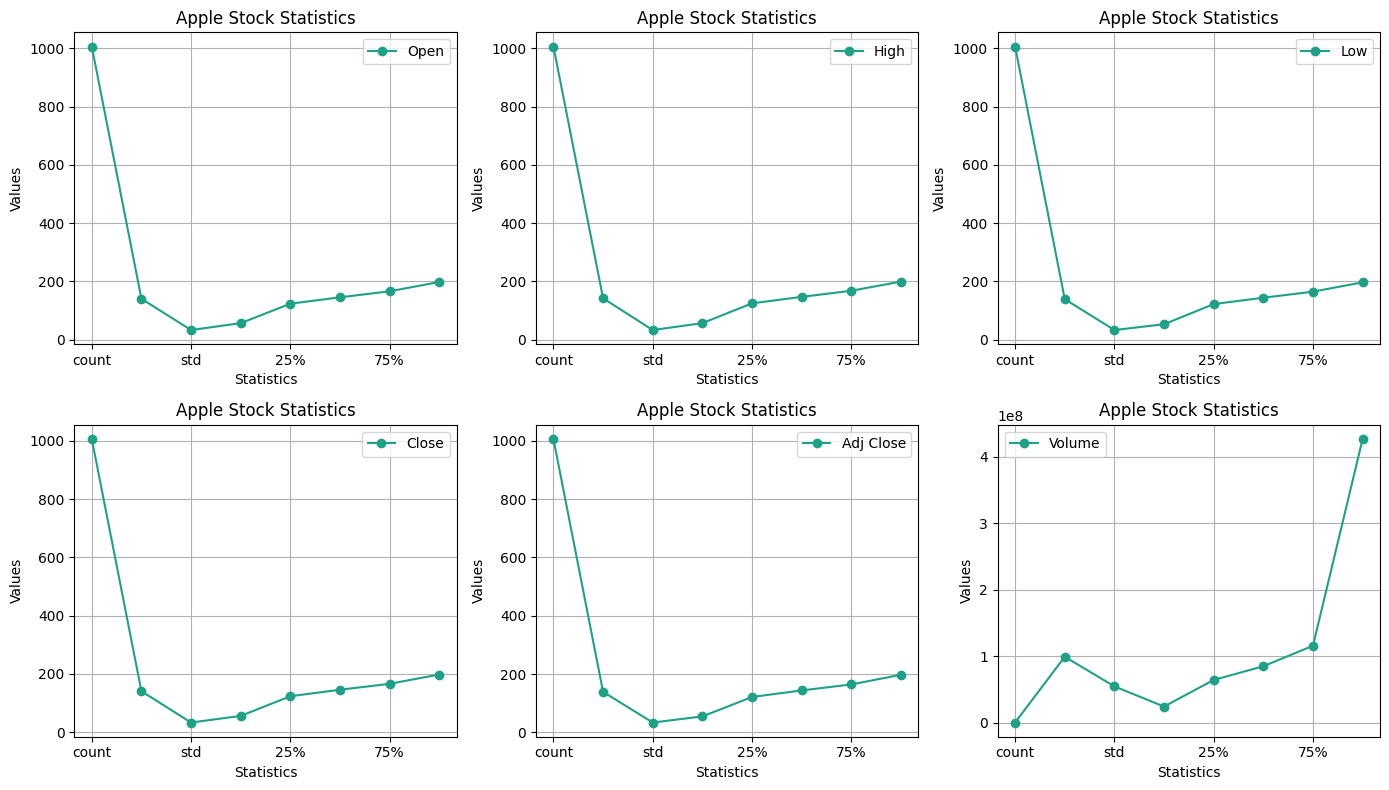

In [6]:
import random

aux = data.describe()
aux.columns = aux.columns.get_level_values(0)

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

id_column = [i for i in range(len(aux.columns))]

count = -1

for id_sub_row in range(2):
    for id_sub_column in range(3):
        count += 1
        # Create the subgraph
        aux.iloc[:, id_column[count]].plot(kind='line', marker='o', ax=axes[id_sub_row, id_sub_column], 
                                           legend=aux.columns[id_column[count]], color=palette_colors[3])
        axes[id_sub_row, id_sub_column].set_title('Apple Stock Statistics')
        axes[id_sub_row, id_sub_column].set_xlabel('Statistics')
        axes[id_sub_row, id_sub_column].set_ylabel('Values')
        axes[id_sub_row, id_sub_column].grid(True)

# Show the graph
plt.tight_layout()
plt.show()
plt.close()
#descriptive statistics plot-gráfico de estadísticos descriptivos.

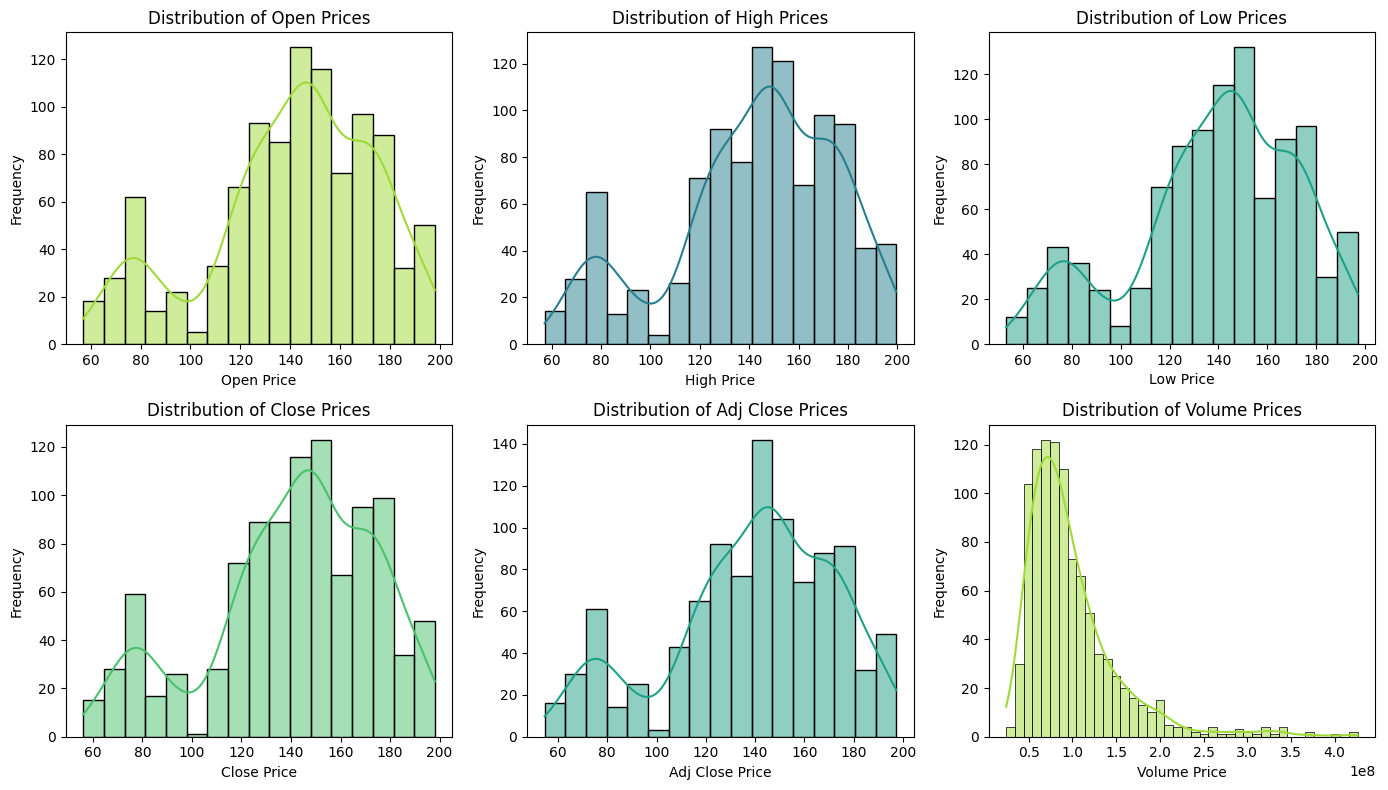

In [7]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

id_column = [i for i in range(len(data.columns))]
count = -1

for id_sub_row in range(2):
    for id_sub_column in range(3):
        count += 1
        # Create the subgraph
        sns.histplot(data.iloc[:, id_column[count]], ax=axes[id_sub_row, id_sub_column], 
                     color=palette_colors[random.randint(0, 5)], kde=True, legend=False)
        axes[id_sub_row, id_sub_column].set_title(f'Distribution of {data.columns[count]} Prices')
        axes[id_sub_row, id_sub_column].set_xlabel(f'{data.columns[count]} Price')
        axes[id_sub_row, id_sub_column].set_ylabel('Frequency')
        axes[id_sub_row, id_sub_column].grid(False)

# Show the graph
plt.tight_layout()
plt.show()
plt.close()
#Grafico de densidad

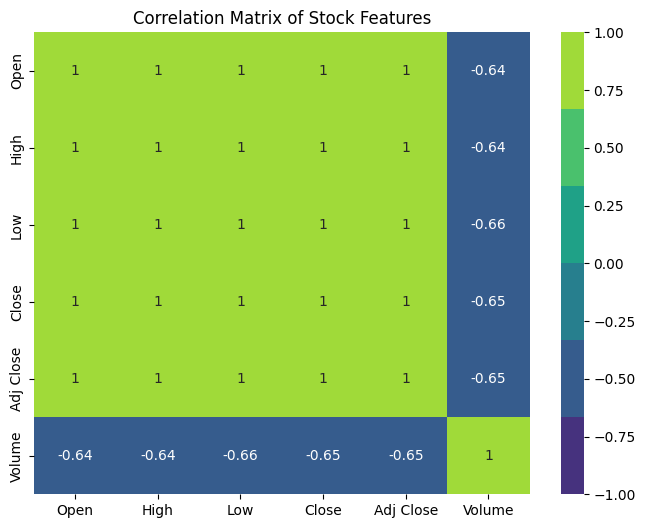

In [8]:
# Correlation matrix between features
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap=palette_colors, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Stock Features')
plt.grid(False)
plt.show()
plt.close()

### Visualize the candlestick chart and the weekly returns for Apple (AAPL)

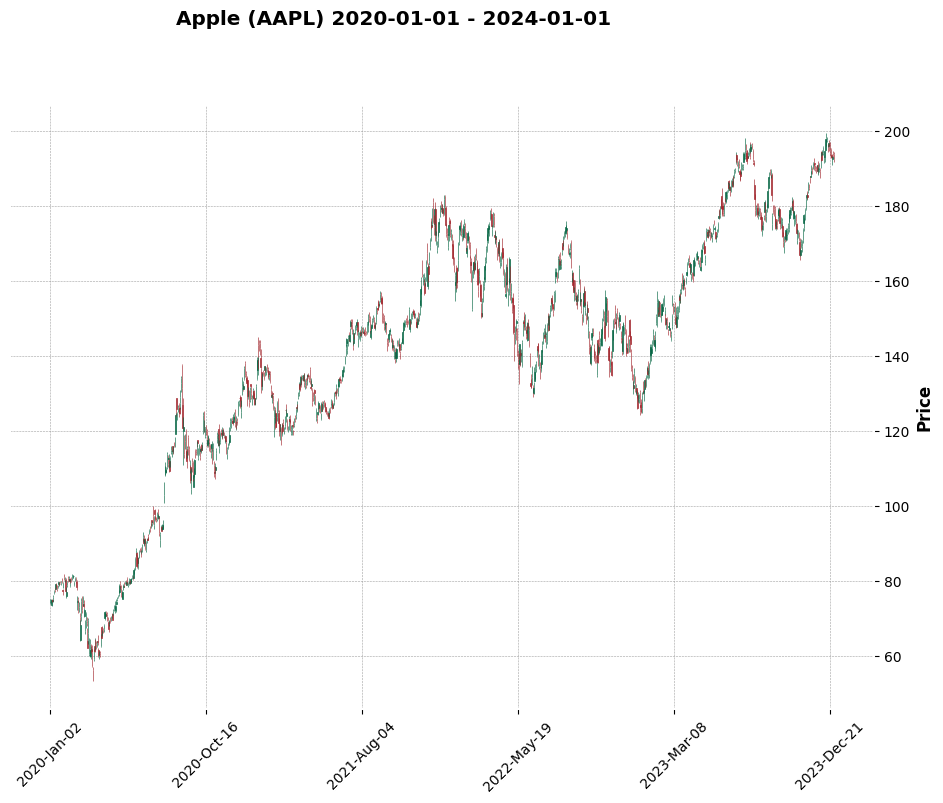

In [9]:
# Import necessary library for financial plotting
import mplfinance as mpf

# mplfinance is not installed
# !pip install mplfinance

# Ensure proper column names in the dataset (handling multi-level index if present)
data.columns = data.columns.get_level_values(0)

# Plot the candlestick chart using mplfinance
mpf.plot(data, 
         type='candle',  # Set plot type to candlestick
         title='Apple (AAPL) 2020-01-01 - 2024-01-01',  # Set the plot title
         ylabel='Price',  # Set label for the y-axis
         style='charles',  # Set plot style (in this case, 'charles')
         figscale=1.5)  # Adjust figure scale for better readability


# ---------------------
# Clustering Algorithms
# --------------------

###  Data Preparation

In [10]:
# Data Preparation

# Select relevant columns for analysis: 'Close' and 'Volume'
df = data[['Close', 'Volume']]


In [11]:
# Data Normalization

# Initialize the StandardScaler for normalizing the data
scaler = StandardScaler()

# We normalize the data
df_scaled = scaler.fit_transform(df)


In [12]:
# We convert back to DataFrame for easier analysis
df_scaled = pd.DataFrame(df_scaled, columns=['Close', 'Volume'])

# Display the first few rows of the scaled DataFrame
df_scaled.head()



,Close,Volume
0,-1.973753,0.671853
1,-1.995677,0.871273
2,-1.977882,0.357463
3,-1.988469,0.182453
4,-1.952430,0.609296


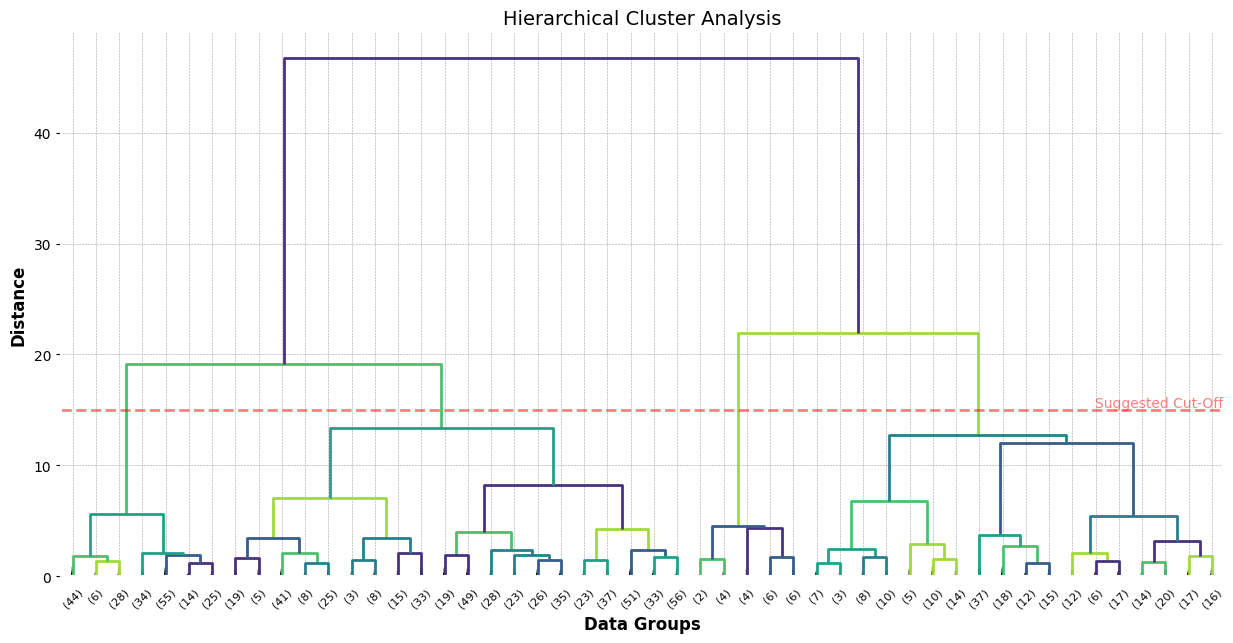

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Convert RGB colors to hexadecimal format
hex_colors = palette_colors.as_hex()

# Function to assign colors, returning color strings
def get_color(index):
    return hex_colors[index % len(hex_colors)]

# Compute linkage matrix
Z = linkage(df_scaled, method='ward')

# Set up the plot
plt.figure(figsize=(15, 8))

# Create the dendrogram with customized colors
dendrogram(
    Z,
    leaf_rotation=45,
    leaf_font_size=8,
    truncate_mode='lastp',  # Show only the last 'p' clusters
    p=50,  # Number of clusters to display
    show_contracted=True,
    link_color_func=get_color,
    above_threshold_color='black'  # Color for clusters above threshold
)

# Add a horizontal line suggesting the cut-off point
cutoff_value = 15
plt.axhline(y=cutoff_value, color='red', linestyle='--', alpha=0.5)
plt.text(plt.xlim()[1], cutoff_value, 'Suggested Cut-Off', 
         va='bottom', ha='right', color='red', alpha=0.5)

# Set plot title and labels
plt.title('Hierarchical Cluster Analysis', fontsize=14)
plt.xlabel('Data Groups', fontsize=12)
plt.ylabel('Distance', fontsize=12)

# Adjust margins
plt.subplots_adjust(bottom=0.2)
plt.show()


### Clustering Algorithms: K-Means

In [14]:
# Define the k range for the Silhouette Score
range_k_silhouette = range(2, 11)
silhouette_scores = []

# Calculate the Silhouette Coefficient for each k value
for k in range_k_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize KMeans with k clusters
    kmeans_labels = kmeans.fit_predict(df_scaled)  # Fit the model and get the cluster labels
    silhouette_avg = silhouette_score(df_scaled, kmeans_labels)  # Compute the average Silhouette Score
    silhouette_scores.append(silhouette_avg)  # Append the score for the current k value

# Display the Silhouette Scores for the range of k values
silhouette_scores


[0.5680854588977559,
 0.5142910176499981,
 0.427204620780442,
 0.4312008635308325,
 0.42115640877064686,
 0.42459223217322334,
 0.3930266478453976,
 0.4115267790780199,
 0.38422292152599435]

In [15]:
kmeans

KMeans(n_clusters=10, random_state=42)

In [16]:
# K-means Model Evaluation

# Calculate the Silhouette Score for the K-means model
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)

# Calculate the Davies-Bouldin Index for the K-means model
davies_bouldin_kmeans = davies_bouldin_score(df_scaled, kmeans_labels)

# Display the evaluation metrics
print(f'Silhouette Score (K-means): {silhouette_kmeans}')
print(f'Davies-Bouldin Index (K-means): {davies_bouldin_kmeans}')


Silhouette Score (K-means): 0.38422292152599435
Davies-Bouldin Index (K-means): 0.812298996284294


In [17]:
# Define the range of k values for the Elbow Method
range_k_codo = range(1, 11)
sse = [] #Sum of Squared Errors

# Calculate SSE (Sum of Squared Errors) for each k value
for k in range_k_codo:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize K-Means with k clusters
    kmeans.fit(df_scaled)  # Fit the model to the data
    sse.append(kmeans.inertia_)  # Append the inertia (SSE) for each k

sse

[2011.9999999999995,
 905.4296689688126,
 652.8749568731932,
 432.76312396548434,
 343.6577270442727,
 284.3739919053402,
 235.57447202038315,
 209.4986886669442,
 174.03770233210489,
 162.40632717852205]

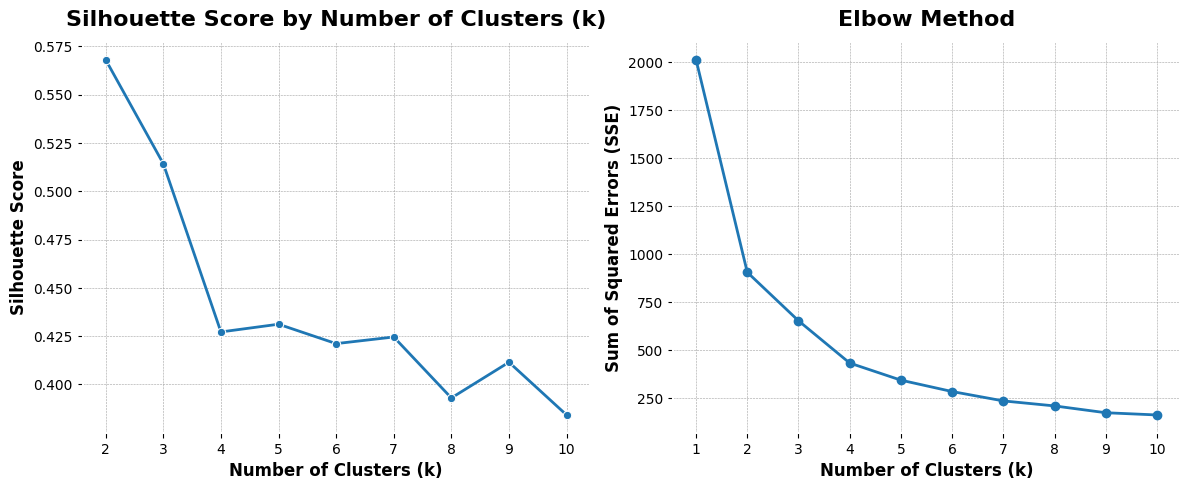

In [18]:

# Create a figure with 1 row and 2 columns for the two plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust the size as needed

# Plot the Silhouette Score
sns.lineplot(x=range_k_silhouette, y=silhouette_scores, marker='o', ax=axes[0])
axes[0].set_title('Silhouette Score by Number of Clusters (k)', fontsize=16, fontweight='bold', y=1.02)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Silhouette Score', fontsize=12)
axes[0].set_xticks(range_k_silhouette)
axes[0].grid(True)

# Plot the Elbow Method
axes[1].plot(range_k_codo, sse, marker='o')
axes[1].set_title('Elbow Method', fontsize=16, fontweight='bold', y=1.02)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Sum of Squared Errors (SSE)', fontsize=12)
axes[1].set_xticks(range_k_codo)
axes[1].grid(True)

# Adjust the layout to avoid overlap between plots
plt.tight_layout()
plt.show()
plt.close()



## K-Means Clustering

In [19]:
# K-Means Clustering

# Initialize the K-Means model with 3 clusters and a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the scaled data and predict the cluster labels
kmeans_labels = kmeans.fit_predict(df_scaled)

# Display the K-Means model object with configuration
kmeans


KMeans(n_clusters=3, random_state=42)

In [20]:
# K-Means Model Evaluation

# Calculate the Silhouette Score for the K-Means model
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)

# Calculate the Davies-Bouldin Index for the K-Means model
davies_bouldin_kmeans = davies_bouldin_score(df_scaled, kmeans_labels)

# Store the evaluation results in a dictionary
results = {
    'Silhouette Score (K-Means)': [silhouette_kmeans],
    'Davies-Bouldin Index (K-Means)': [davies_bouldin_kmeans]
}

# Convert the results dictionary into a DataFrame for easy viewing
results_df_kmeans = pd.DataFrame(results)

# Display the evaluation results DataFrame
results_df_kmeans



,Silhouette Score (K-Means),Davies-Bouldin Index (K-Means)
0,0.514291,0.7262


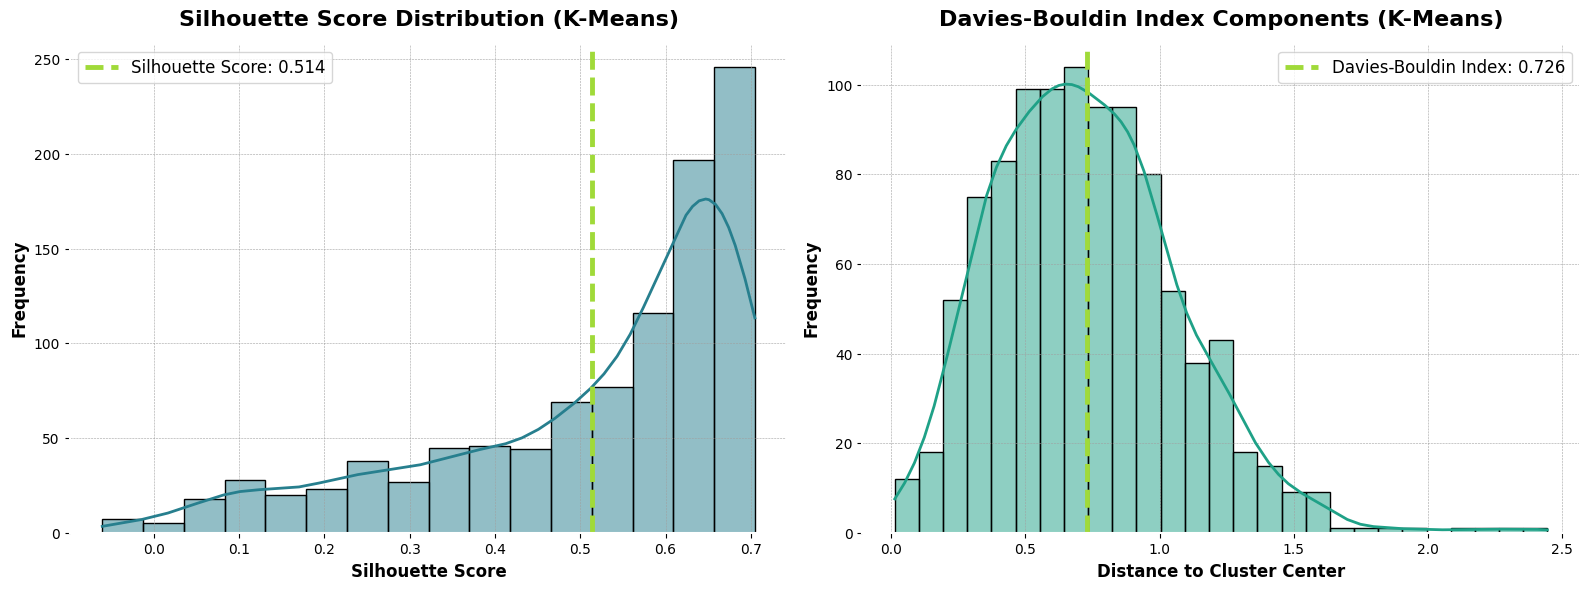

In [21]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# First subplot: Silhouette Score Distribution
silhouette_values = silhouette_samples(df_scaled, kmeans_labels)
sns.histplot(silhouette_values, kde=True, color=palette_colors[2], ax=ax1)
ax1.set_title('Silhouette Score Distribution (K-Means)', fontsize=16, fontweight='bold', y=1.02)
ax1.set_xlabel('Silhouette Score', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.axvline(x=silhouette_kmeans, color=palette_colors[5], linestyle='--', linewidth=3.5,
            label=f'Silhouette Score: {silhouette_kmeans:.3f}')
ax1.legend(fontsize=12)

# Second subplot: Davies-Bouldin Distribution
# Calculate distances to cluster centers for K-means
cluster_distances = []
for cluster_idx in range(len(np.unique(kmeans_labels))):
    mask = kmeans_labels == cluster_idx
    cluster_points = df_scaled[mask]
    center = kmeans.cluster_centers_[cluster_idx]
    distances = np.sqrt(np.sum((cluster_points - center) ** 2, axis=1))
    cluster_distances.extend(distances)

sns.histplot(cluster_distances, kde=True, color=palette_colors[3], ax=ax2)
ax2.set_title('Davies-Bouldin Index Components (K-Means)', fontsize=16, fontweight='bold', y=1.02)
ax2.set_xlabel('Distance to Cluster Center', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.axvline(x=np.mean(cluster_distances), color=palette_colors[5], linestyle='--', linewidth=3.5,
            label=f'Davies-Bouldin Index: {davies_bouldin_kmeans:.3f}')
ax2.legend(fontsize=12)

# Adjust the layout
plt.tight_layout()
plt.show()
plt.close()


### Clustering Algorithms: DBSCAN

In [22]:
# Initialize variables to track the best scores and corresponding parameters
best_score_silhouette = 0.0
best_score_dbscan = 0.0
best_eps = None
best_min_samples = None

# Define the range of values for eps and min_samples
# eps_values = np.arange(0.01, 1.0, 0.01) # Alternative range for eps
eps_values = [0.3]  # Example fixed value for eps
min_samples_values = range(4, 21)  # Range for min_samples

# Loop through eps and min_samples values to find the optimal DBSCAN parameters
for eps in eps_values:
    for min_samples in min_samples_values:
        # Initialize and fit the DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(df_scaled)
        
        # Check if the model has at least 4 clusters (including -1 for outliers)
        if len(set(dbscan_labels)) == 4:
            silhouette_avg = silhouette_score(df_scaled, dbscan_labels)  # Calculate the silhouette score
            davies_bouldin_dbscan = davies_bouldin_score(df_scaled, dbscan_labels)  # Calculate the Davies-Bouldin Index
            
            # Update the best score if current parameters are better
            if silhouette_avg > best_score_silhouette and davies_bouldin_dbscan > best_score_dbscan:
                best_score_silhouette = silhouette_avg
                best_score_dbscan = davies_bouldin_dbscan
                best_eps = eps
                best_min_samples = min_samples

# Print the best parameters
print(f"Best eps: {best_eps:.2f}, Best min_samples: {best_min_samples}, "
    f"Best Silhouette Score: {best_score_silhouette:.2f}, "
    f"Best DBSCAN Score: {best_score_dbscan:.2f}")

Best eps: 0.30, Best min_samples: 5, Best Silhouette Score: 0.50, Best DBSCAN Score: 1.14


In [23]:
# DBSCAN Clustering

# Initialize the DBSCAN model with chosen eps and min_samples parameters
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit the model to the scaled data and predict the cluster labels
dbscan_labels = dbscan.fit_predict(df_scaled)

# Calculate the Silhouette Score for the DBSCAN model
silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels)

# Display the Silhouette Score
silhouette_dbscan


0.5019427569680395

In [24]:
# DBSCAN Model Evaluation

# Calculate the Silhouette Score for the DBSCAN model
silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels)

# Calculate the Davies-Bouldin Index for the DBSCAN model
davies_bouldin_dbscan = davies_bouldin_score(df_scaled, dbscan_labels)

# Store the evaluation results in a dictionary
results = {
    'Silhouette Score (DBSCAN)': [silhouette_dbscan],
    'Davies-Bouldin Index (DBSCAN)': [davies_bouldin_dbscan]
}

# Convert the results dictionary into a DataFrame for easy viewing
results_df_DBSCAN = pd.DataFrame(results)

# Display the evaluation results DataFrame
results_df_DBSCAN


,Silhouette Score (DBSCAN),Davies-Bouldin Index (DBSCAN)
0,0.501943,1.144734


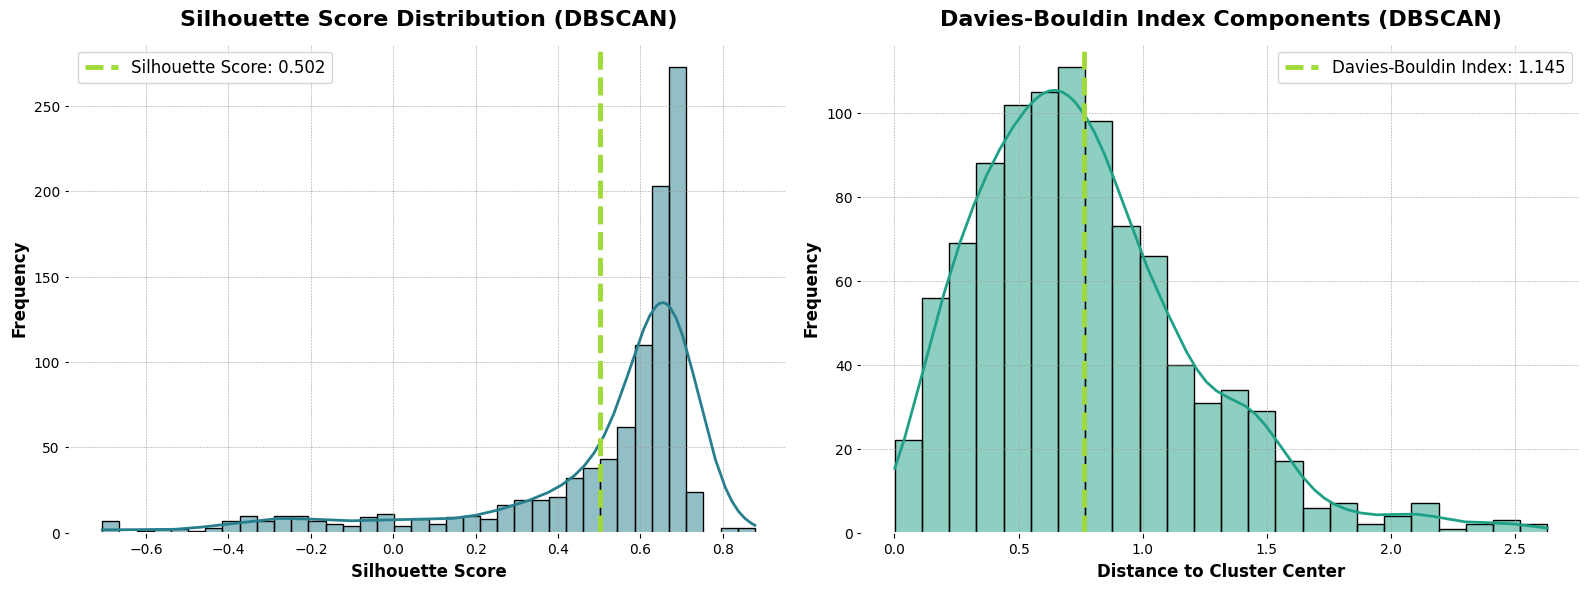

In [25]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# First subplot: Silhouette Score Distribution
silhouette_values = silhouette_samples(df_scaled, dbscan_labels)
sns.histplot(silhouette_values, kde=True, color=palette_colors[2], ax=ax1)
ax1.set_title('Silhouette Score Distribution (DBSCAN)', fontsize=16, fontweight='bold', y=1.02)
ax1.set_xlabel('Silhouette Score', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.axvline(x=silhouette_dbscan, color=palette_colors[5], linestyle='--', linewidth=3.5,
            label=f'Silhouette Score: {silhouette_dbscan:.3f}')
ax1.legend(fontsize=12)

# Second subplot: Davies-Bouldin Distribution
# Calculate Davies-Bouldin score for each cluster
n_clusters = len(np.unique(dbscan_labels[dbscan_labels >= 0]))
cluster_centers = []
cluster_distances = []

for i in range(n_clusters):
    mask = dbscan_labels == i
    if np.sum(mask) > 0:
        center = np.mean(df_scaled[mask], axis=0)
        cluster_centers.append(center)
        # Calculate distances from points to their cluster center
        distances = np.sqrt(np.sum((df_scaled[mask] - center) ** 2, axis=1))
        cluster_distances.extend(distances)

sns.histplot(cluster_distances, kde=True, color=palette_colors[3], ax=ax2)
ax2.set_title('Davies-Bouldin Index Components (DBSCAN)', fontsize=16, fontweight='bold', y=1.02)
ax2.set_xlabel('Distance to Cluster Center', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.axvline(x=np.mean(cluster_distances), color=palette_colors[5], linestyle='--', linewidth=3.5,
            label=f'Davies-Bouldin Index: {davies_bouldin_dbscan:.3f}')
ax2.legend(fontsize=12)

# Adjust the layout
plt.tight_layout()
plt.show()
plt.close()


## -------------------
## Evaluation and comparison of clustering results
## -------------------

In [26]:
# Define the data for Silhouette Score and Davies-Bouldin Index
data_comp = {
    'Clustering Algorithm': ['K-Means', 'DBSCAN'],
    'Silhouette Score': [silhouette_kmeans, silhouette_dbscan],
    'Davies-Bouldin Index': [davies_bouldin_kmeans, davies_bouldin_dbscan]
}

# Create a DataFrame for displaying the metrics
df_metrics = pd.DataFrame(data_comp)

# Display the DataFrame
df_metrics


,Clustering Algorithm,Silhouette Score,Davies-Bouldin Index
0,K-Means,0.514291,0.726200
1,DBSCAN,0.501943,1.144734


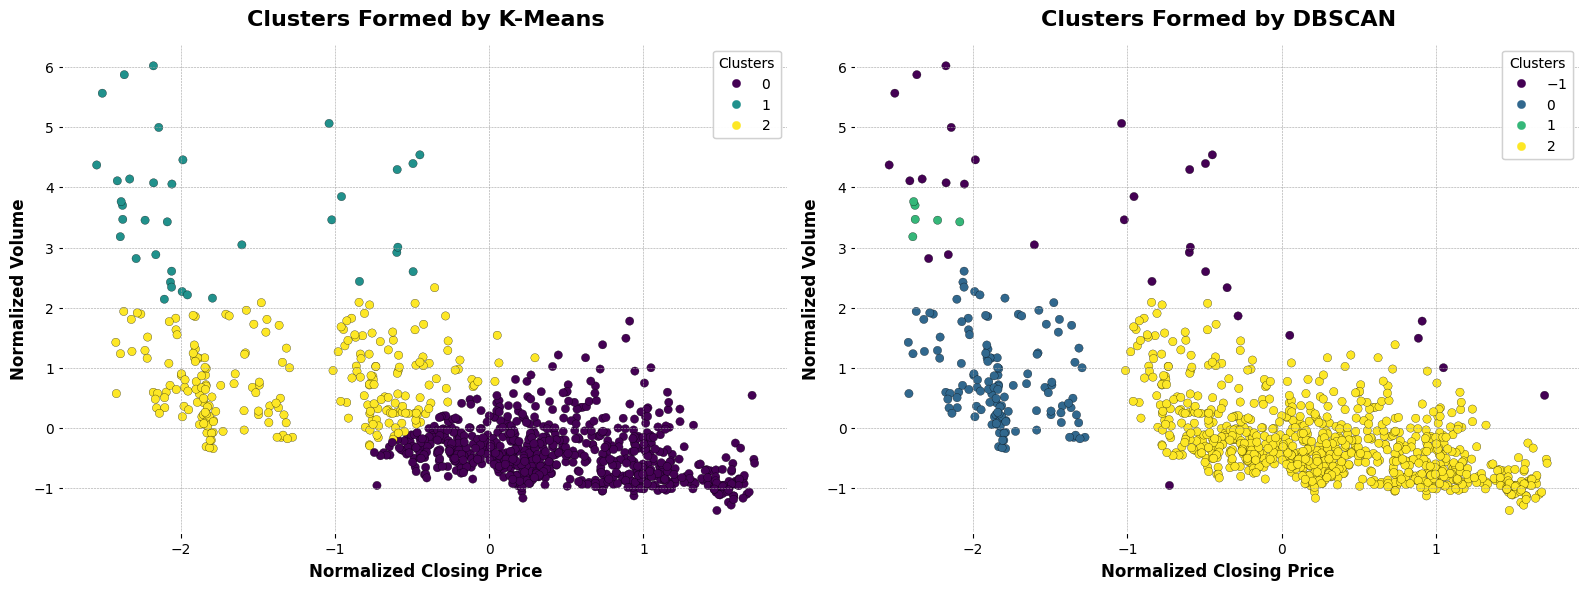

In [27]:
# Display K-Means and DBSCAN clustering side by side

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# K-Means Clustering Visualization
scatter_kmeans = ax1.scatter(df_scaled['Close'], df_scaled['Volume'], c=kmeans_labels, cmap=colors, 
                             edgecolors='black', linewidths=0.2)

# Set title and axis labels for K-Means
ax1.set_title('Clusters Formed by K-Means', fontsize=16, fontweight='bold', y=1.02)
ax1.set_xlabel('Normalized Closing Price')
ax1.set_ylabel('Normalized Volume')

# Add legend for K-Means clusters
legend_kmeans = ax1.legend(*scatter_kmeans.legend_elements(), title="Clusters")
ax1.add_artist(legend_kmeans)

# DBSCAN Clustering Visualization
scatter_dbscan = ax2.scatter(df_scaled['Close'], df_scaled['Volume'], c=dbscan_labels, cmap=colors, 
                             edgecolors='black', linewidths=0.2)

# Set title and axis labels for DBSCAN
ax2.set_title('Clusters Formed by DBSCAN', fontsize=16, fontweight='bold', y=1.02)
ax2.set_xlabel('Normalized Closing Price')
ax2.set_ylabel('Normalized Volume')

# Add legend for DBSCAN clusters
legend_dbscan = ax2.legend(*scatter_dbscan.legend_elements(), title="Clusters")
ax2.add_artist(legend_dbscan)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# ----------------------
# Time Series Analysis
# ----------------------

In [28]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167618,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868134,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700


In [29]:
# Ensure the index is of datetime type
data.index = pd.to_datetime(data.index)

# Display the first 10 rows of the dataset
data.head(10)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167618,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.127785,170108400
2020-01-10,77.650002,78.167503,77.062500,77.582497,75.297630,140644800
2020-01-13,77.910004,79.267502,77.787498,79.239998,76.906303,121532000
2020-01-14,79.175003,79.392502,78.042503,78.169998,75.867813,161954400


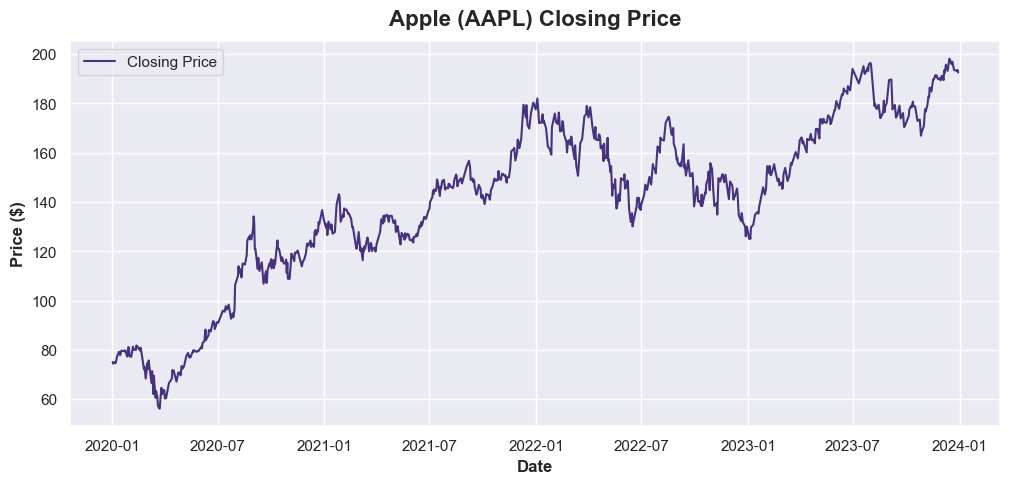

In [30]:
# Visualization of Closing Price
sns.set_theme(palette=palette_colors)  # Set the theme and color palette
plt.figure(figsize=(12, 5))  # Define the figure size

# Create a line plot for the 'Close' column
sns.lineplot(data=data['Close'], label='Closing Price', linewidth=1.5)

# Set the title and axis labels with proper formatting
plt.title('Apple (AAPL) Closing Price', fontsize=16, fontweight='bold', y=1.02)
plt.xlabel('Date')
plt.ylabel('Price ($)')

# Add legend to the plot
plt.legend()

# Display the plot
plt.show()
plt.close()


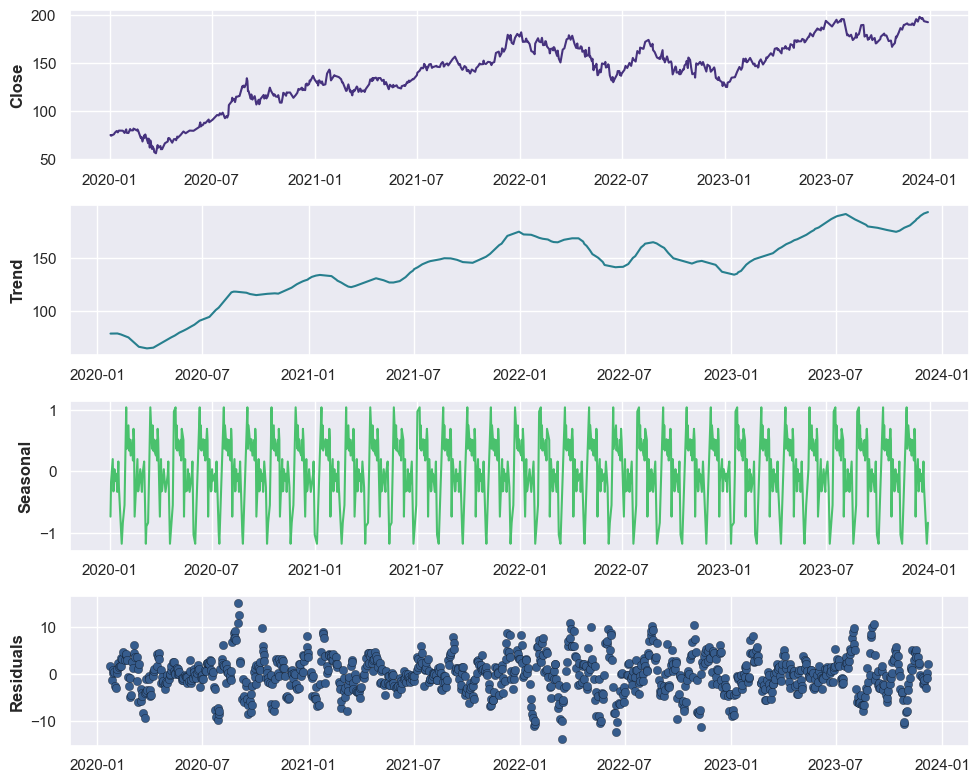

In [31]:
# Perform seasonal decomposition of the 'Close' data using an additive model
decomposition = sm.tsa.seasonal_decompose(data['Close'], model='additive', period=30)

# Create a figure with 4 subplots (one for each decomposition component)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

# Plot each component of the decomposition with custom colors
ax1.plot(decomposition.observed, color=palette_colors[0])
ax1.set_ylabel('Close')  # Observed data (actual 'Close' prices)

ax2.plot(decomposition.trend, color=palette_colors[2])
ax2.set_ylabel('Trend')  # Trend component

ax3.plot(decomposition.seasonal, color=palette_colors[4])
ax3.set_ylabel('Seasonal')  # Seasonal component

ax4.scatter(decomposition.resid.index, decomposition.resid, color=palette_colors[1], 
            edgecolors='black', linewidths=0.2)
ax4.set_ylabel('Residuals')  # Residual component

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()
plt.close()


In [32]:
# Display the observed data (actual 'Close' prices)
decomposition.observed.head()


Date
2020-01-02    75.087502
2020-01-03    74.357498
2020-01-06    74.949997
2020-01-07    74.597504
2020-01-08    75.797501
Name: Close, dtype: float64

In [33]:
# from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    result = adfuller(series.dropna())
    labels = ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    adf_values = {label: value for value, label in zip(result[0:4], labels)}
    
    crit_values = result[4]
    crit_values = {f'Critical Value {key}': value for key, value in crit_values.items()}
    
    adf_values.update(crit_values)
    
    # Convert to DataFrame
    df = pd.DataFrame(adf_values, index=[title])
    return df

# Apply the ADF test and get the results in a DataFrame
adf_results_df = adf_test(data['Close'], 'Closing Price')
adf_results_df

,ADF Statistic,p-value,# Lags Used,Number of Observations Used,Critical Value 1%,Critical Value 5%,Critical Value 10%
Closing Price,-1.555344,0.505978,0,1005,-3.436873,-2.86442,-2.568304


In [34]:
# Calculate the first difference of the 'Close' prices to remove trends or make the series stationary
data['Close_diff'] = data['Close'].diff()

# Apply the ADF test to the differenced 'Close' prices and store the results in a DataFrame
adf_test_df = adf_test(data['Close_diff'], 'Differenced Closing Price')

# Display the ADF test results
adf_test_df


,ADF Statistic,p-value,# Lags Used,Number of Observations Used,Critical Value 1%,Critical Value 5%,Critical Value 10%
Differenced Closing Price,-33.004757,0.0,0,1004,-3.43688,-2.864423,-2.568305


In [35]:
from statsmodels.tsa.stattools import adfuller

print('Analyzing if there is Seasonality in CLOSE')

# H0: data is not seasonal
# H1: data is seasonal
result_quantity = adfuller(data['Close'])
p_value = result_quantity[1]
alpha = 0.05  # Significance level

if p_value > alpha:
    print("Accept null hypothesis. Data is not seasonal, the appropriate model is ARIMA for CLOSE")
else:
    print("Reject null hypothesis. Data is seasonal, the appropriate model is SARIMA")

print('p-value for Close:', p_value)


Analyzing if there is Seasonality in CLOSE
Accept null hypothesis. Data is not seasonal, the appropriate model is ARIMA for CLOSE
p-value for Close: 0.5059778789717139


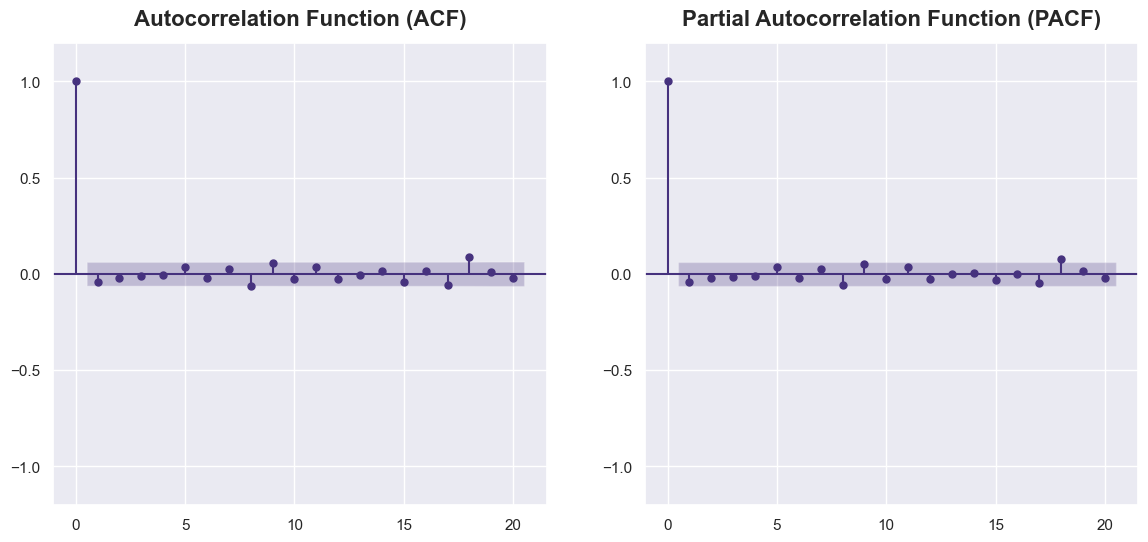

In [36]:
# Identification of ARIMA Parameters (p, d, q) using ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a figure with two subplots for ACF and PACF
plt.figure(figsize=(14, 6))

# Plot the Autocorrelation Function (ACF)
plt.subplot(121)  # 1 row, 2 columns, 1st subplot
acf_ax = plt.gca()
plot_acf(data['Close_diff'].dropna(), ax=acf_ax, lags=20)
plt.title('Autocorrelation Function (ACF)', fontsize=16, fontweight='bold', y=1.02)
acf_ax.set_ylim([-1.2, 1.2])  # Adjust the y-axis limit to create space above and below the plot

# Plot the Partial Autocorrelation Function (PACF)
plt.subplot(122)  # 1 row, 2 columns, 2nd subplot
pacf_ax = plt.gca()
plot_pacf(data['Close_diff'].dropna(), ax=pacf_ax, lags=20)
plt.title('Partial Autocorrelation Function (PACF)', fontsize=16, fontweight='bold', y=1.02)
pacf_ax.set_ylim([-1.2, 1.2])  # Adjust the y-axis limit to create space above and below the plot

# Display the plots
plt.show()
plt.close()


## -------------------------
## Time Series Analysis with ARIMA
## -------------------------

In [37]:

# Nested loop to calculate AIC values for different ARIMA configurations
aic_values = []

# Iterate over different values of d, p (ari), and q (maj) to find the optimal ARIMA configuration
for d in range(1, 3):  # Test differencing terms (d) from 1 to 2
    for p in range(0, 3):  # Test AR terms (p) from 0 to 2
        for q in range(0, 3):  # Test MA terms (q) from 0 to 2
            try:
                # Fit ARIMA model with the current configuration of (p, d, q)
                arima_model = ARIMA(data['Close'].tolist(), order=(p, d, q))
                arima_model_fit = arima_model.fit()
                
                # Append the (p, d, q) configuration and its AIC value
                aic_values.append([p, d, q, arima_model_fit.aic])
                
            except ValueError:
                # Skip configurations that are not viable
                pass

# Display all calculated AIC values
aic_values


[[0, 1, 0, 4811.269102612541],
 [0, 1, 1, 4811.610606759304],
 [0, 1, 2, 4813.145836563829],
 [1, 1, 0, 4811.6828706738015],
 [1, 1, 1, 4813.1285403224165],
 [1, 1, 2, 4815.0802817642125],
 [2, 1, 0, 4813.192864470505],
 [2, 1, 1, 4815.076473121631],
 [2, 1, 2, 4817.0918018278535],
 [0, 2, 0, 5542.4056812921535],
 [0, 2, 1, 4814.443316537971],
 [0, 2, 2, 4814.685134687268],
 [1, 2, 0, 5243.358539398732],
 [1, 2, 1, 4814.767088678078],
 [1, 2, 2, 4816.483012660761],
 [2, 2, 0, 5119.475171275508],
 [2, 2, 1, 4816.221454166279],
 [2, 2, 2, 4814.576823169919]]

In [38]:
# Declare and initialize an ARIMA model with the specified order (p=1, d=1, q=1)
p, d, q = 1, 1, 1  # Define the ARIMA model parameters
arima_model = ARIMA(data['Close'].tolist(), order=(p, d, q))

# Here, d=2 specifies the number of times the data is differenced, controlling the degree of differencing.

# Train the ARIMA model by calling the fit() method
arima_fit = arima_model.fit()

# Display the summary of the trained model to review coefficients, AIC, and other diagnostics
# Display the ARIMA model summary
print('\nARIMA Model Summary:')
print(arima_fit.summary())



ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1006
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2403.564
Date:                Sun, 27 Oct 2024   AIC                           4813.129
Time:                        18:19:35   BIC                           4827.867
Sample:                             0   HQIC                          4818.729
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3929      0.500      0.786      0.432      -0.586       1.372
ma.L1         -0.4353      0.493     -0.884      0.377      -1.401       0.530
sigma2         6.9956      0.2

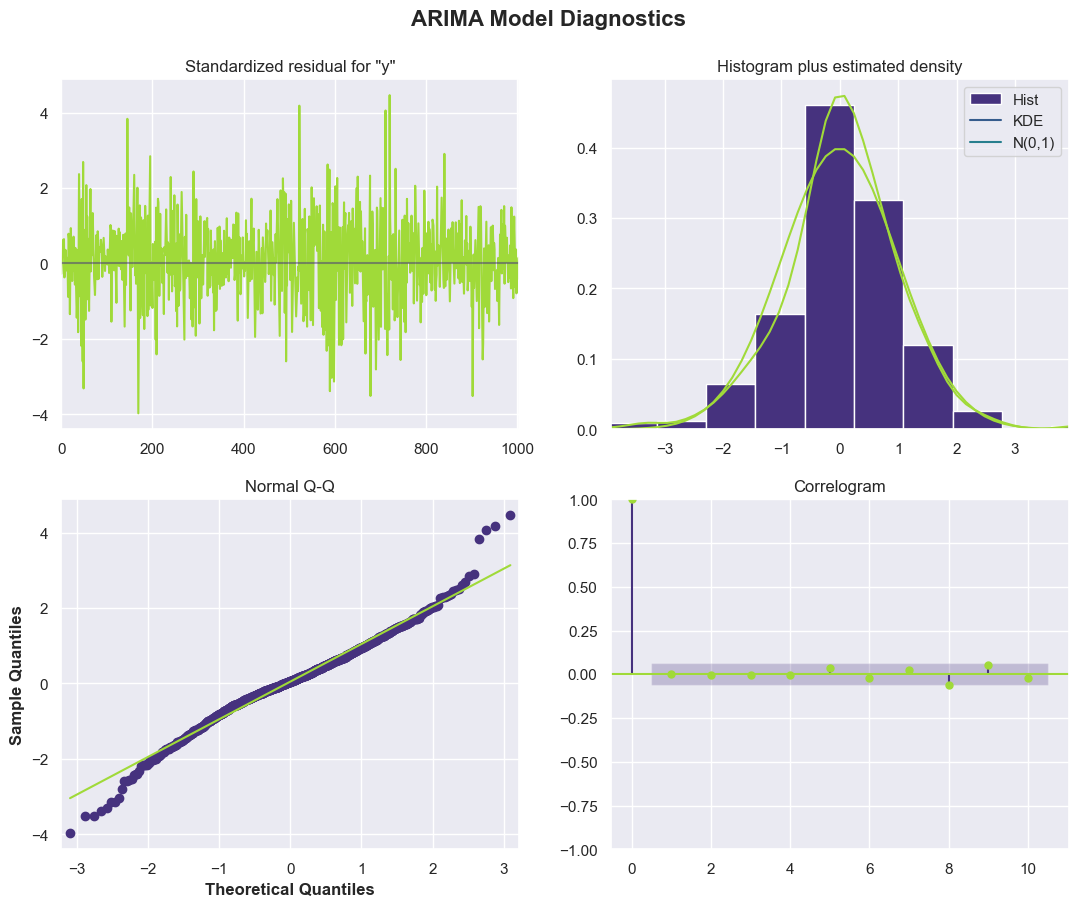

In [39]:
# Residual Diagnostics for ARIMA model with custom line color
fig = arima_fit.plot_diagnostics(figsize=(13, 10))
fig.suptitle('ARIMA Model Diagnostics', fontsize=16, y=0.95)  # Adjust the y-position of the title

# Change the color of all lines in the plots
for ax in fig.get_axes():
    for line in ax.get_lines():
        line.set_color(palette_colors[5])  # Set custom color for ARIMA diagnostics

# Display the ARIMA diagnostic plots
plt.show()


In [40]:
# Check for NaN values in the dataset
nan_summary_df = pd.DataFrame(data.isna().sum(), columns=['NaN Count'])

# Display the summary of NaN values for each column
nan_summary_df


,NaN Count
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Close_diff,1


In [41]:
# Remove rows with NaN values in the 'Close' and 'Forecast' columns
data = data.dropna()

# Check if there are any remaining NaN values in the dataset
nan_summary_df = pd.DataFrame(data.isna().sum(), columns=['NaN Count'])

# Display the summary of NaN values for each column
nan_summary_df


,NaN Count
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Close_diff,0


In [42]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Close_diff
Date,,,,,,,
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167618,146322800,-0.730003
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200,0.592499
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000,-0.352493
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200,1.199997
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.127785,170108400,1.610001


In [43]:
import pandas as pd

# Store the fitted values from the ARIMA model in 'pred'
pred = arima_model_fit.fittedvalues

# Adjust 'pred' length to match 'data' by trimming the extra value if necessary
pred = pd.Series(pred[-len(data):], index=data.index)

# Add 'ARIMA' column to store fitted values in the main DataFrame
data['ARIMA'] = pred

# Calculate residuals plus fitted values and store in 'diffval'
diffval = arima_model_fit.resid + arima_model_fit.fittedvalues

# Adjust 'diffval' length to match 'data' by trimming if necessary
diffval = pd.Series(diffval[-len(data):], index=data.index)

# Add 'diffval' as a new column in the DataFrame
data['diffval'] = diffval

# Display the first five records to check the results
data.head()



,Open,High,Low,Close,Adj Close,Volume,Close_diff,ARIMA,diffval
Date,,,,,,,,,
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167618,146322800,-0.730003,112.631248,74.357498
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200,0.592499,73.628061,74.949997
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000,-0.352493,74.871565,74.597504
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200,1.199997,74.412819,75.797501
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.127785,170108400,1.610001,75.975357,77.407501


In [44]:
# Declare the array 'pred' and append the values 
pred = arima_model_fit.fittedvalues

# Convert 'pred' to a pandas Series, aligning with 'data' index and trimming to match length if necessary
pred = pd.Series(pred[-len(data):], index=data.index)  # Adjust length to match 'data' index

# Add a new column 'ARIMA' into dataframe
data['ARIMA'] = pred

# Calculate the sum of residuals and fitted values to store as 'diffval'
diffval = arima_model_fit.resid + arima_model_fit.fittedvalues

# Convert 'diffval' to a pandas Series, aligning with 'data' index and trimming to match length if necessary
diffval = pd.Series(diffval[-len(data):], index=data.index)  # Adjust length to match 'data' index

# Add the 'diffval' column to the main DataFrame
data['diffval'] = diffval

# Display the first five records for verification
data.head()



,Open,High,Low,Close,Adj Close,Volume,Close_diff,ARIMA,diffval
Date,,,,,,,,,
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167618,146322800,-0.730003,112.631248,74.357498
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200,0.592499,73.628061,74.949997
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000,-0.352493,74.871565,74.597504
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200,1.199997,74.412819,75.797501
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.127785,170108400,1.610001,75.975357,77.407501


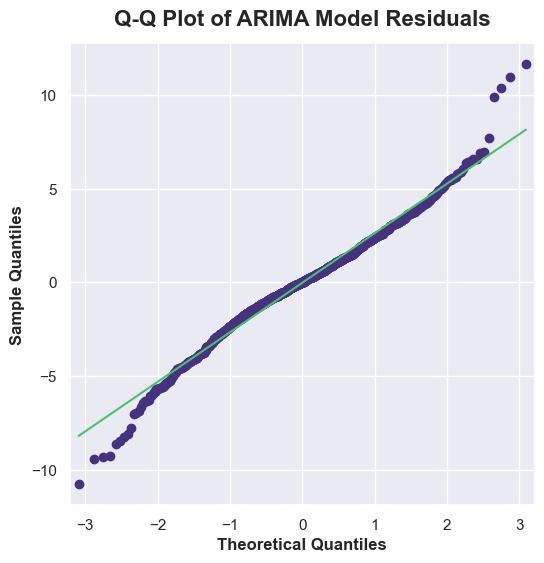

In [45]:
import statsmodels.api as sm

# Q-Q plot to compare residual quantiles with the theoretical quantiles of a normal distribution
fig, ax = plt.subplots(figsize=(6, 6))

# Exclude the first two residual points to remove any potential anomalies
residuals = arima_model_fit.resid[2:]

# Generate the Q-Q plot with custom colors
sm.qqplot(residuals, line='s', ax=ax, color=palette_colors[2])  # Set color for points
ax.get_lines()[1].set_color(palette_colors[4])  # Set color for the Q-Q line

# Set plot title
plt.title("Q-Q Plot of ARIMA Model Residuals", fontsize=16, fontweight='bold', y=1.02)
plt.show()

In [46]:
# Print the 'diffval' and 'ARIMA' columns from the DataFrame
print(data[['diffval', 'ARIMA']])

               diffval       ARIMA
Date                              
2020-01-03   74.357498  112.631248
2020-01-06   74.949997   73.628061
2020-01-07   74.597504   74.871565
2020-01-08   75.797501   74.412819
2020-01-09   77.407501   75.975357
...                ...         ...
2023-12-22  193.600006  195.047414
2023-12-26  193.050003  193.555445
2023-12-27  193.149994  193.418421
2023-12-28  193.580002  193.082569
2023-12-29  192.529999  193.856181

[1005 rows x 2 columns]


In [47]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Close_diff,ARIMA,diffval
Date,,,,,,,,,
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167618,146322800,-0.730003,112.631248,74.357498
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200,0.592499,73.628061,74.949997
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000,-0.352493,74.871565,74.597504
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200,1.199997,74.412819,75.797501
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.127785,170108400,1.610001,75.975357,77.407501


In [48]:
data['diffval'].iloc[2:]

Date
2020-01-07     74.597504
2020-01-08     75.797501
2020-01-09     77.407501
2020-01-10     77.582497
2020-01-13     79.239998
                 ...    
2023-12-22    193.600006
2023-12-26    193.050003
2023-12-27    193.149994
2023-12-28    193.580002
2023-12-29    192.529999
Name: diffval, Length: 1003, dtype: float64

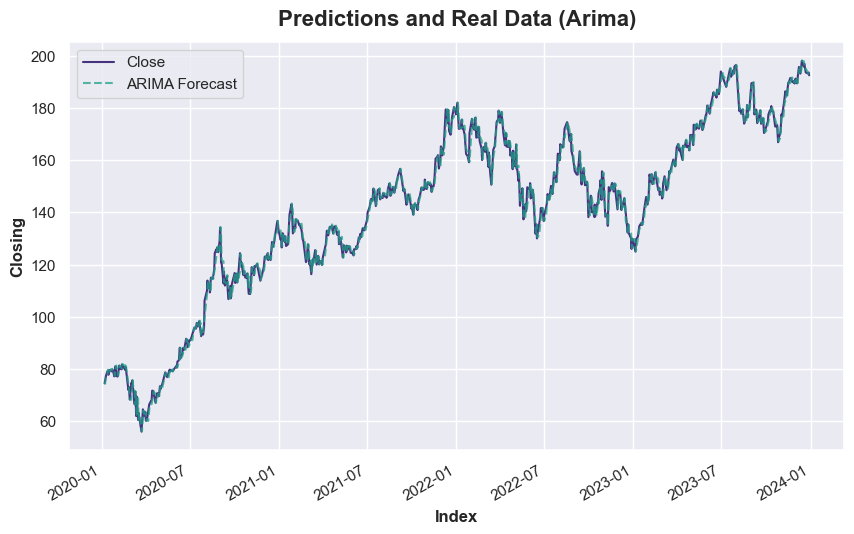

In [49]:
#Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(10, 6)

# Ignore first two rows because of difference factor d = 2
data['diffval'].iloc[2:].plot(color=palette_colors[0], linestyle='-', ax=axarr, label='Close')  
data['ARIMA'].iloc[2:].plot(color=palette_colors[3], linestyle='--', ax=axarr, label='ARIMA Forecast', alpha=0.75)  

# Set titles, labels, and legend
axarr.set_title('Predictions and Real Data (Arima)', fontsize=16, fontweight='bold', y=1.02)
axarr.set_xlabel('Index')
axarr.set_ylabel('Closing')
axarr.legend()  # Add legend

# Display the plot
plt.show()

In [50]:
# Generate forecast for the next period (or adjust 'steps' for multiple periods)
forecast_result = arima_model_fit.get_forecast(steps=10)  # Change 'steps' to desired forecast length
forecast_values = forecast_result.predicted_mean

# Align forecast values with DataFrame index and add them as a new column
data['Forecast'] = pd.Series(forecast_values, index=data.index[-len(forecast_values):])

# Print the 'diffval', 'ARIMA', and 'Forecast' columns
print(data[['diffval', 'ARIMA', 'Forecast']])


               diffval       ARIMA    Forecast
Date                                          
2020-01-03   74.357498  112.631248         NaN
2020-01-06   74.949997   73.628061         NaN
2020-01-07   74.597504   74.871565         NaN
2020-01-08   75.797501   74.412819         NaN
2020-01-09   77.407501   75.975357         NaN
...                ...         ...         ...
2023-12-22  193.600006  195.047414  193.263035
2023-12-26  193.050003  193.555445  193.278405
2023-12-27  193.149994  193.418421  193.484345
2023-12-28  193.580002  193.082569  193.523134
2023-12-29  192.529999  193.856181  193.708532

[1005 rows x 3 columns]


In [51]:
#  Forecast Generation
forecast_steps = 30  # Define the Number of periods to predict
forecast_result = arima_model_fit.get_forecast(steps=forecast_steps)  # Generate forecast
forecast_df = forecast_result.summary_frame()  # Get DataFrame with 'mean', 'mean_ci_lower', 'mean_ci_upper'
forecast_index = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='D')[1:]  # Generate forecast dates
forecast_df.index = forecast_index  # Assign forecast dates to the forecast DataFrame



In [52]:
forecast_df

y,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-12-30,192.527311,2.639940,187.353124,197.701497
2023-12-31,192.832250,3.664871,185.649234,200.015266
2024-01-01,192.778156,4.420410,184.114312,201.442000
2024-01-02,193.045463,5.103072,183.043626,203.047300
2024-01-03,193.030395,5.675966,181.905705,204.155085
2024-01-04,193.263035,6.221046,181.070009,205.456061
2024-01-05,193.278405,6.703544,180.139700,206.417110
2024-01-06,193.484345,7.170435,179.430550,207.538139
2024-01-07,193.523134,7.596311,178.634638,208.411631
2024-01-08,193.708532,8.011356,178.006563,209.410502


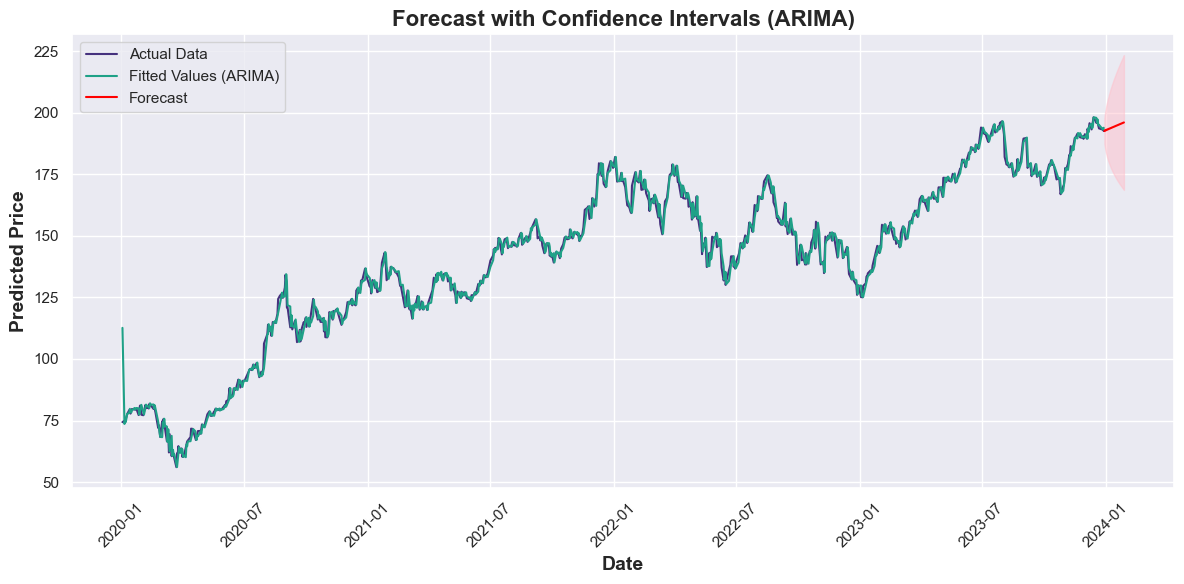

In [53]:
#  Plotting the Forecast
plt.figure(figsize=(12, 6))

# Plot the actual data and fitted values
plt.plot(data.index, data['Close'], label='Actual Data', color=palette_colors[0])
plt.plot(data.index, data['ARIMA'], label='Fitted Values (ARIMA)', color=palette_colors[3])

# Plot forecasted mean values and confidence intervals
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.5)

# Set title, labels, and display settings
plt.title('Forecast with Confidence Intervals (ARIMA)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


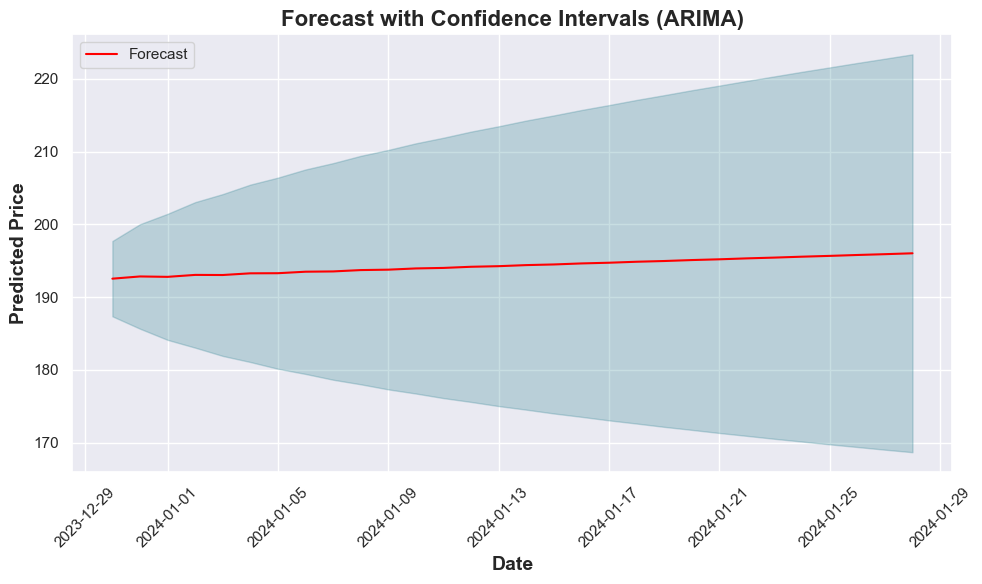

In [54]:
# Second plot: Forecast only with confidence intervals
plt.figure(figsize=(10, 6))

# Plot forecasted mean values
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast', color='red')

# Plot confidence intervals
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color=palette_colors[2], alpha=0.25)

# Set title and axis labels
plt.title('Forecast with Confidence Intervals (ARIMA)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)

# Display legend, grid, and customize x-axis ticks
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)

# Optimize layout and display the plot
plt.tight_layout()
plt.show()

In [55]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA(1,1,1) model
arima_model = ARIMA(data['Close'], order=(1, 1, 1)).fit()

# Generate the forecast and predicted mean
forecast_result = arima_model.get_forecast(steps=1)  # Change 'steps' to forecast multiple periods
forecast_mean = forecast_result.predicted_mean

# Define the confidence levels to analyze
intervals = [0.2, 0.1, 0.05, 0.01] #confidence_level

# Iterate over each confidence level and display the intervals
for alpha in intervals:
    ci = forecast_result.conf_int(alpha=alpha) #confidence_interva
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % 
          ((1 - alpha) * 100, forecast_mean.iloc[0], ci.iloc[0, 0], ci.iloc[0, 1]))


80.0% Confidence Interval: 192.570 between 189.179 and 195.961
90.0% Confidence Interval: 192.570 between 188.217 and 196.923
95.0% Confidence Interval: 192.570 between 187.384 and 197.756
99.0% Confidence Interval: 192.570 between 185.754 and 199.386


## Reference
- Chapter 4, Practical Time Series Analysis, Avishek Pal, PKS Prakash, 2017 Packt Publishing.
 <p>https://machinelearningmastery.com/time-series-forecast-uncertainty-using-confidence-intervals-python/</p>
- Stock Analysis (2024). Apple Inc. (AAPL) Stock Price, Quote & News. 
 <p>https://stockanalysis.com/stocks/aapl/.</p>- 
Yahoo Finance (2024). AAP
 <p> https://finance.yahoo.com/quote/AAPL [Accessed 25 Sep. 2024]</p>
- Mauricio, J. (2007). Análisis de Series Temporales.
 <p>https://www.ucm.es/data/cont/docs/518-2013-11-11-JAM-IAST-Libro.pdf.</p>

